In [179]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy import stats

In [ ]:
nba_data = pd.read_csv('DB-NBA-cleaned.csv', sep=',', comment='#')

nba_df = pd.DataFrame(nba_data)

## Análisis de los tiros más frecuentes

In [77]:
colores = {0: '#C8102E', 1: '#1D428A'}

Hacemos una pequeña exploración de los datos tras el Data Cleaning. La siguiente gráfica muestra la distribución de los tiros más frecuente en el Dataset

<Figure size 1500x600 with 0 Axes>

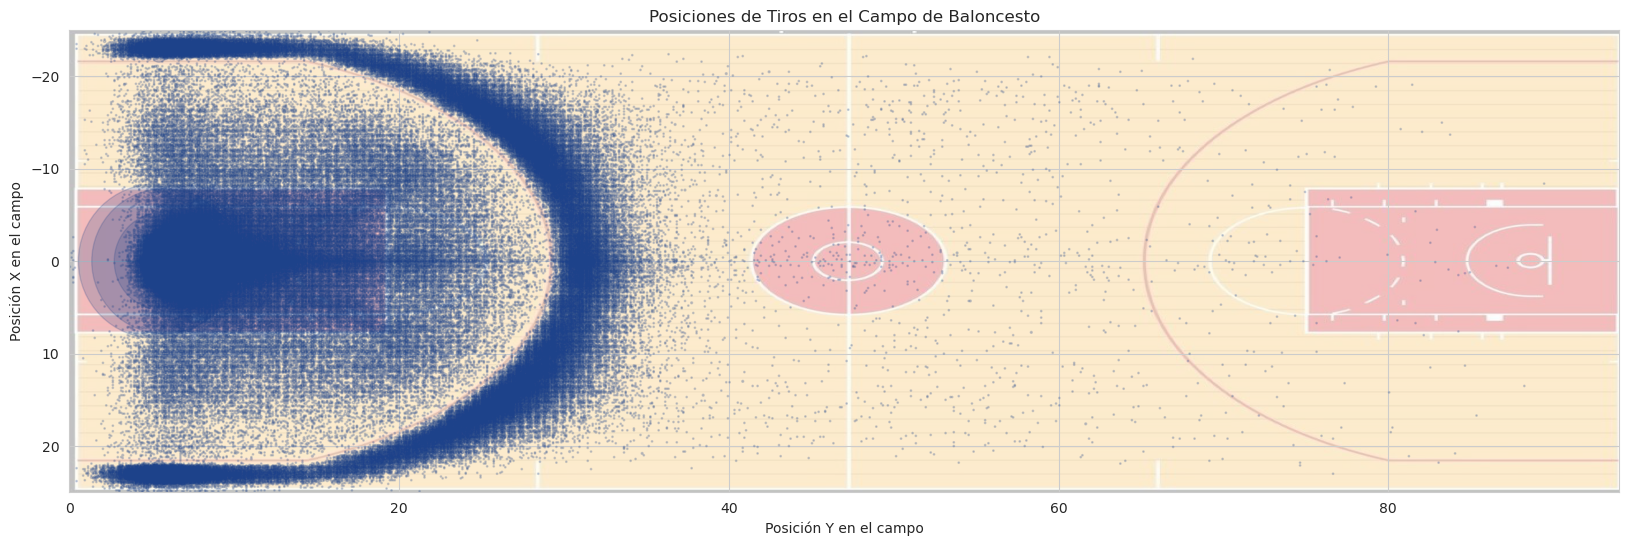

In [85]:
# Crear la figura
plt.figure(figsize=(15, 6))


# Graficar los puntos
grouped = nba_df.groupby(['LOC_X', 'LOC_Y']).size().reset_index(name='count')

plt.figure(figsize=(20, 6))
scatter = plt.scatter(
    grouped['LOC_Y'], 
    grouped['LOC_X'], 
    s=grouped['count'],      # tamaño de burbuja proporcional al número de tiros
    alpha=0.2, 
    color='#1D428A'
)



# Configurar los ejes
plt.xlabel('Posición Y en el campo')
plt.ylabel('Posición X en el campo')
plt.title('Posiciones de Tiros en el Campo de Baloncesto')

background = mpimg.imread('fondo-basket.jpg')  # <-- Tu imagen aquí

plt.imshow(background, extent=[0, 94, 25, -25], aspect='auto', alpha=0.3)

plt.xlim(0, 94)  # Para que el ancho total sea 94 (de -47 a +47)
plt.ylim(25, -25)    # Para que el alto sea 50 (de 0 a 50)

# Mostrar una cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

We can see that most of the shots are thrown in twwo main hotspots:

Under the hoop.
Triple Line Zone.

With a most of the shots being centered, or in the case of the triple line zone, perpendicular to the hoop (dead zone)


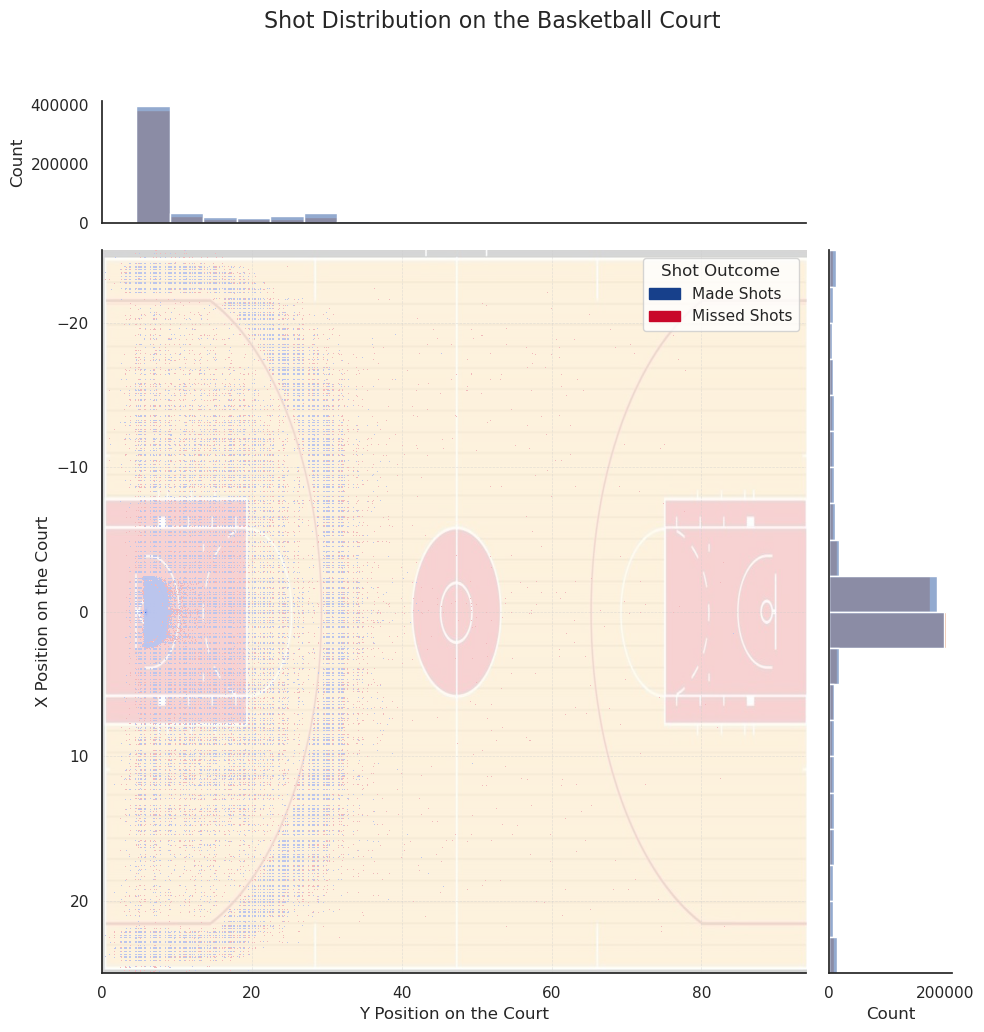

In [102]:
from matplotlib.patches import Patch

# Create jointplot
g = sns.jointplot(
    data=nba_df,
    x='LOC_Y',
    y='LOC_X',
    hue='SHOT_MADE',
    kind='hist',
    palette={1: '#17408B', 0: '#C9082A'},
    height=10,
    ratio=5,
    marginal_ticks=True,
    marginal_kws=dict(bins=20, fill=True, alpha=0.6)
)

# Set the background image on the main (joint) axis
background = mpimg.imread('fondo-basket.jpg')
g.ax_joint.imshow(background, extent=[0, 94, 25, -25], aspect='auto', alpha=0.2)

# Set court dimensions and labels
g.ax_joint.set_xlim(0, 94)
g.ax_joint.set_ylim(25, -25)
g.ax_joint.set_xlabel('Y Position on the Court')
g.ax_joint.set_ylabel('X Position on the Court')

# Add grid
g.ax_joint.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add a custom title above the entire figure
plt.suptitle('Shot Distribution on the Basketball Court', fontsize=16, y=1.03)

# Custom legend
custom_legend = [
    Patch(color='#17408B', label='Made Shots'),
    Patch(color='#C9082A', label='Missed Shots')
]
g.ax_joint.legend(handles=custom_legend, title='Shot Outcome', loc='upper right')

# Tight layout
plt.tight_layout()
plt.show()


However, even if these zones are the prefered ones, there may exist some differents in between those hotspots.

Following, we will divide these distributions between those shots that made it, and those shots that missed the points

In [90]:
nba_acertados = nba_df[nba_df['SHOT_MADE'] == 1].copy()
nba_fallados = nba_df[nba_df['SHOT_MADE'] == 0].copy()

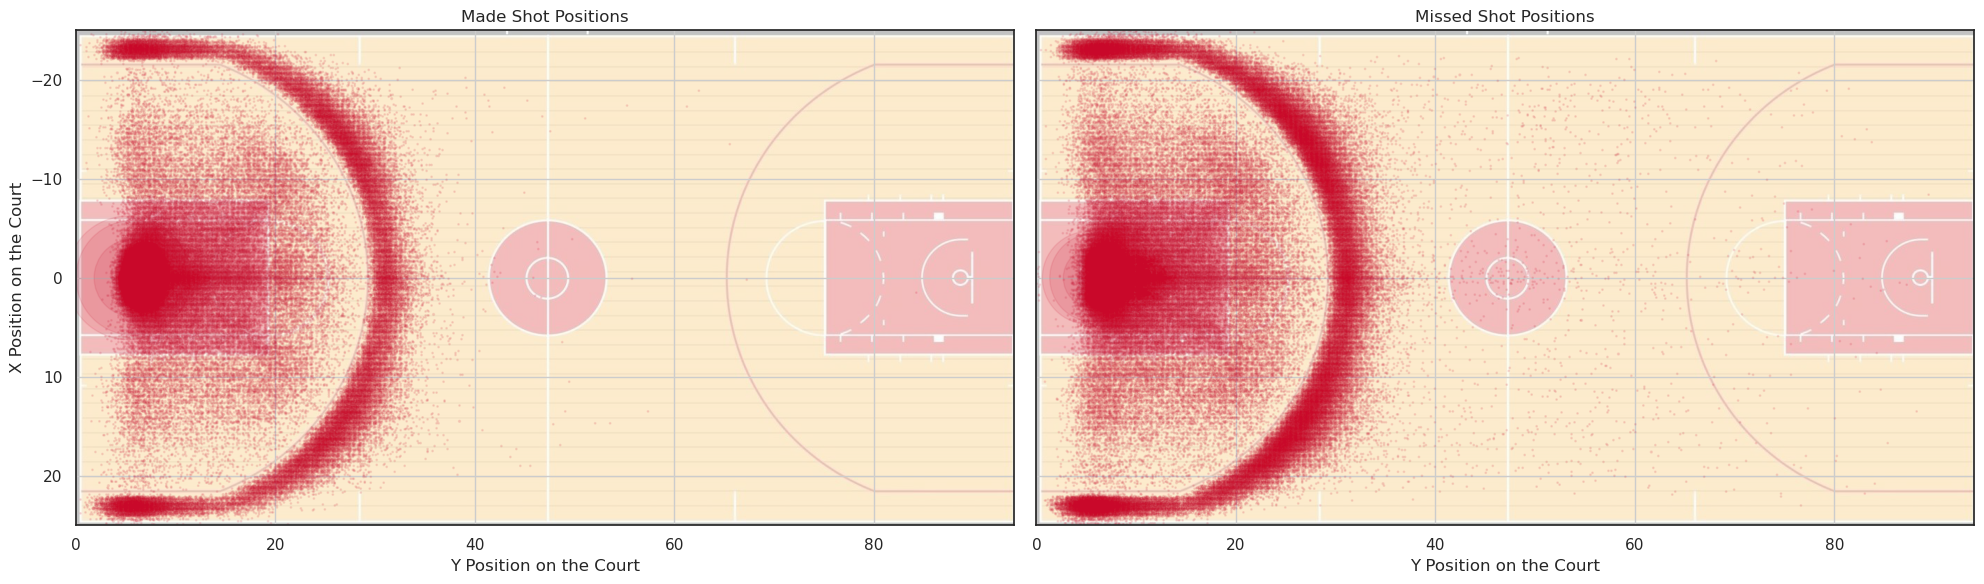

In [103]:
# Agrupar datos
grouped_made = nba_acertados.groupby(['LOC_X', 'LOC_Y']).size().reset_index(name='count')
grouped_missed = nba_fallados.groupby(['LOC_X', 'LOC_Y']).size().reset_index(name='count')

# Cargar imagen de fondo
background = mpimg.imread('fondo-basket.jpg')

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Primer subplot - tiros acertados
axes[0].scatter(
    grouped_made['LOC_Y'],
    grouped_made['LOC_X'],
    s=grouped_made['count'],
    alpha=0.1,
    color='#C9082A'
)
axes[0].imshow(background, extent=[0, 94, 25, -25], aspect='auto', alpha=0.3)
axes[0].set_xlim(0, 94)
axes[0].set_ylim(25, -25)
axes[0].set_xlabel('Y Position on the Court')
axes[0].set_ylabel('X Position on the Court')
axes[0].set_title('Made Shot Positions')
axes[0].grid(True)

# Segundo subplot - tiros fallados
axes[1].scatter(
    grouped_missed['LOC_Y'],
    grouped_missed['LOC_X'],
    s=grouped_missed['count'],
    alpha=0.1,
    color='#C9082A'
)
axes[1].imshow(background, extent=[0, 94, 25, -25], aspect='auto', alpha=0.3)
axes[1].set_xlim(0, 94)
axes[1].set_ylim(25, -25)
axes[1].set_xlabel('Y Position on the Court')
axes[1].set_ylabel('')
axes[1].set_title('Missed Shot Positions')
axes[1].grid(True)

# Ajustar espacio y mostrar
plt.tight_layout()
plt.show()

Even thought it may be minor, we can observe an slight difference between the effectivity of the shots.

We can see a noticeable less density in the shots that were thrown from the triple line zone, specially in those zones that are neither perpendicular nor centered to the hoop

### Count of shots by zone

 On a more detailed approach, we can perceived these difference in a bar chart

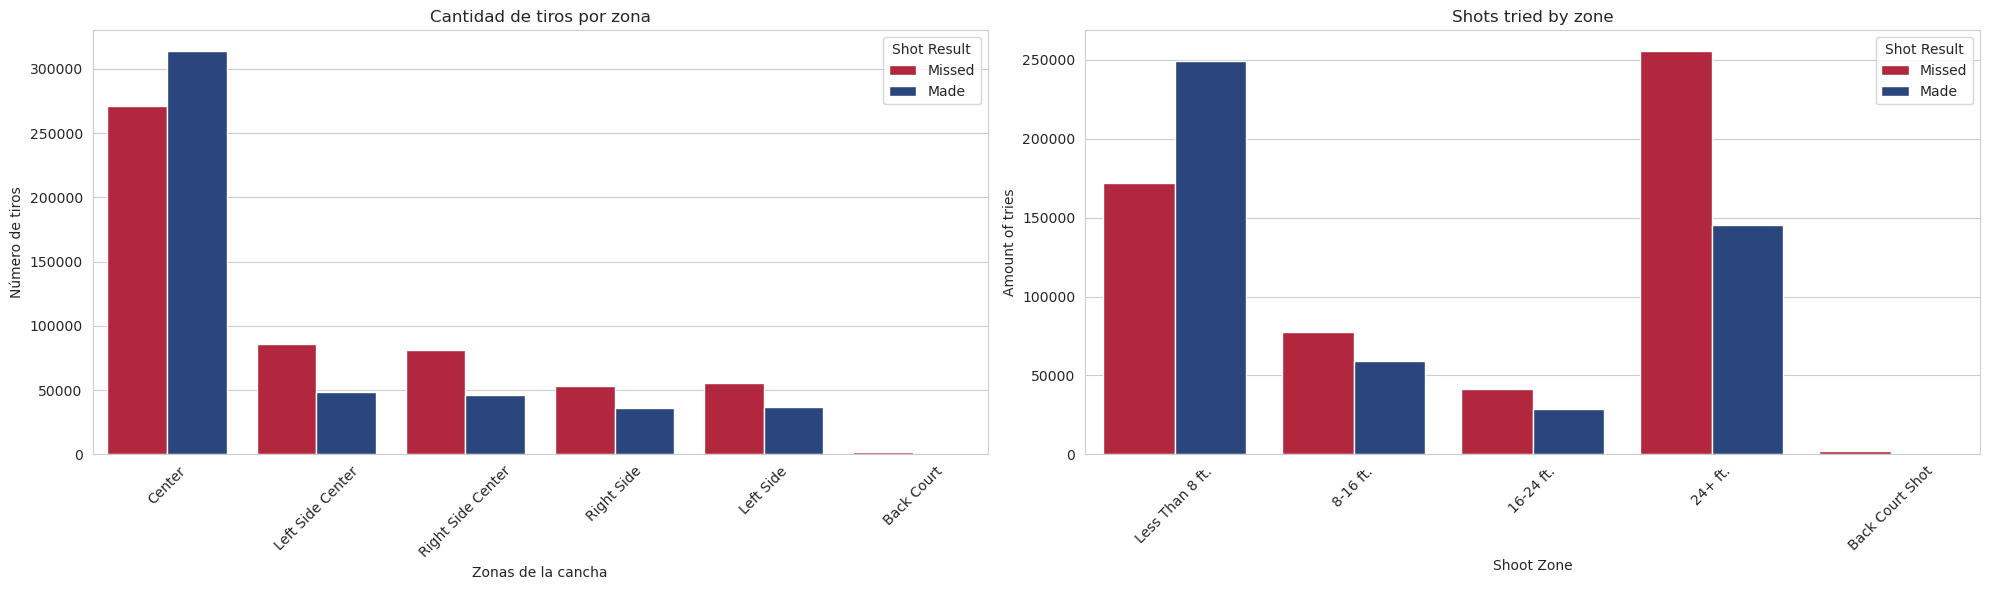

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
colores = {0: '#C8102E', 1: '#1D428A'}
orden_deseado = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.', 'Back Court Shot']

sns.countplot(
    data=nba_df,
    x='ZONE_NAME',
    hue='SHOT_MADE',
    palette= colores,
    ax=ax[0]
)
ax[0].set_title('Cantidad de tiros por zona')
ax[0].set_xlabel('Zonas de la cancha')
ax[0].set_ylabel('Número de tiros')
ax[0].legend(title='Shot Result', labels=['Missed', 'Made'])
ax[0].tick_params(axis='x', rotation=45)

# -------- Gráfico 2: ZONE_RANGE --------
sns.countplot(
    data=nba_df,
    x='ZONE_RANGE',
    hue='SHOT_MADE',
    order=orden_deseado,
    palette=colores,
    ax=ax[1]
)
ax[1].set_title('Shots tried by zone')
ax[1].set_xlabel('Shoot Zone')
ax[1].set_ylabel('Amount of tries')
ax[1].legend(title='Shot Result', labels=['Missed', 'Made'])
ax[1].tick_params(axis='x', rotation=45)

# Ajustar espacios y mostrar
plt.tight_layout()
plt.show()

In [112]:
print('As we can observe, we find some patterns that we have mention previously, getting the center the main focus. both at less than 8ft (hoop zone) and 24+ ft zone')
print("-"*100)
nba_df.groupby('ZONE_RANGE')[['ZONE_NAME','ZONE_RANGE']].value_counts()

As we can observe, we find some patterns that we have mention previously, getting the center the main focus. both at less than 8ft (hoop zone) and 24+ ft zone
----------------------------------------------------------------------------------------------------


ZONE_RANGE       ZONE_NAME        
16-24 ft.        Center                19310
                 Right Side Center     18783
                 Left Side Center      17568
                 Left Side              7442
                 Right Side             7054
24+ ft.          Left Side Center     116892
                 Right Side Center    108932
                 Center                77159
                 Left Side             51517
                 Right Side            46985
8-16 ft.         Center                67301
                 Right Side            35479
                 Left Side             33655
Back Court Shot  Back Court             2189
Less Than 8 ft.  Center               421417
Name: count, dtype: int64

Close to a half are made at 8 ft or less of the hoop, with the majority of it being centered. The other half is distributed between the other zones, being second most frequent the 24+ ft zone, weith over a 100k shots

There is also a dramatic on the effectiveness of the shots as we predicted.

#### Efectividad de tiros por zona

In [124]:
nba_df.groupby('ZONE_RANGE')[['SHOT_MADE']].mean()*100


,SHOT_MADE
ZONE_RANGE,
16-24 ft.,40.637427
24+ ft.,36.263621
8-16 ft.,43.371569
Back Court Shot,2.878026
Less Than 8 ft.,59.124098


Close to the hoop shots, specially on the less than 8ft shows to be the most succesful range of all, with close to a 60% of sucess rate. 20% over the mid range (8-16ft) and the triple zone range (16-24ft and 24+ ft)

In [ ]:

#upongamos que tus datos están en nba_df con columnas LOC_X y LOC_Y
x = nba_df['LOC_Y']
y = nba_df['LOC_X']

# Crear la malla para los contornos
xi, yi = np.mgrid[0:94:500j, -25:25:500j]  # Resolución de 500 puntos

# Estimar densidad 2D
kde = gaussian_kde([x, y])
zi = kde(np.vstack([xi.ravel(), yi.ravel()]))

# Cargar la imagen del campo
background = mpimg.imread('fondo-basket.jpg')

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 6))

# Fondo del campo
ax.imshow(background, extent=[0, 94, 25, -25], aspect='auto', alpha=0.3)

# Contornos de densidad
contour = ax.contourf(xi, yi, zi.reshape(xi.shape), levels=15, cmap='coolwarm', alpha=0.7)

# Etiquetas y título
ax.set_xlabel('Posición Y en el campo')
ax.set_ylabel('Posición X en el campo')
ax.set_title('Mapa de Contornos de Tiros en el Campo de Baloncesto')

# Límites del campo
ax.set_xlim(0, 94)
ax.set_ylim(25, -25)

plt.colorbar(contour, ax=ax, label='Densidad de tiros')
plt.show()


### Porcentajes de tiros en las distintas zonas

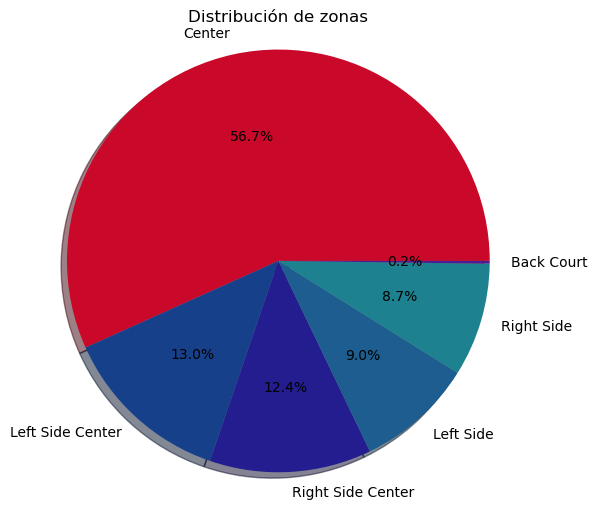

In [13]:
x = nba_df['ZONE_NAME'].value_counts()


label = nba_df['ZONE_NAME'].tolist()

plt.figure(figsize=(6,6))
plt.pie(x.values, labels=x.index,autopct='%1.1f%%', shadow = True, colors=('#C9082A','#17408B','#241D8F','#1D5D8F','#1D818F','#4A1D8F'))
plt.title('Distribución de zonas')
plt.axis('equal')
plt.show()

In [ ]:
analysis_columns = ['SHOT_DISTANCE','']

from scipy import stats.select_dtypes(include='number').corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()



SyntaxError: unmatched ')' (958646892.py, line 3)

<Axes: xlabel='TIME_LEFT_SECONDS', ylabel='SHOT_DISTANCE'>

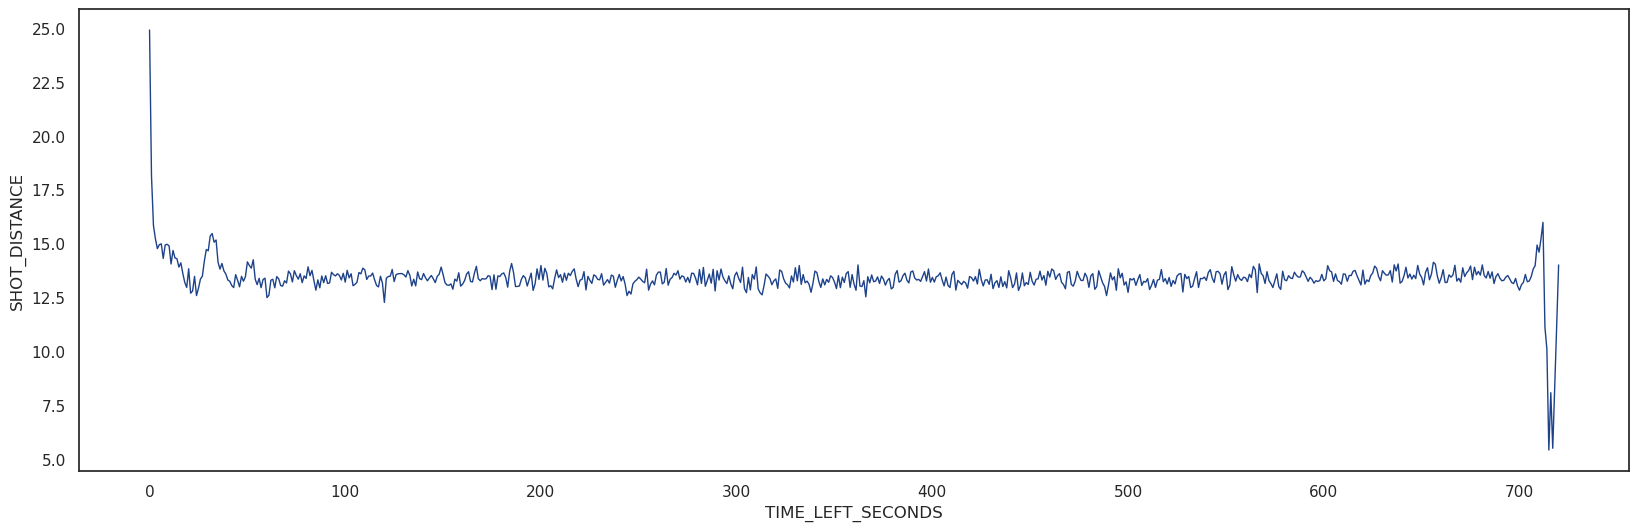

In [178]:
shots_by_distance = nba_df.groupby('TIME_LEFT_SECONDS')['SHOT_DISTANCE'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.lineplot(
    x='TIME_LEFT_SECONDS', 
    y='SHOT_DISTANCE', 
    data=shots_by_distance,
    linewidth=1,
    color='#1D428A'
)


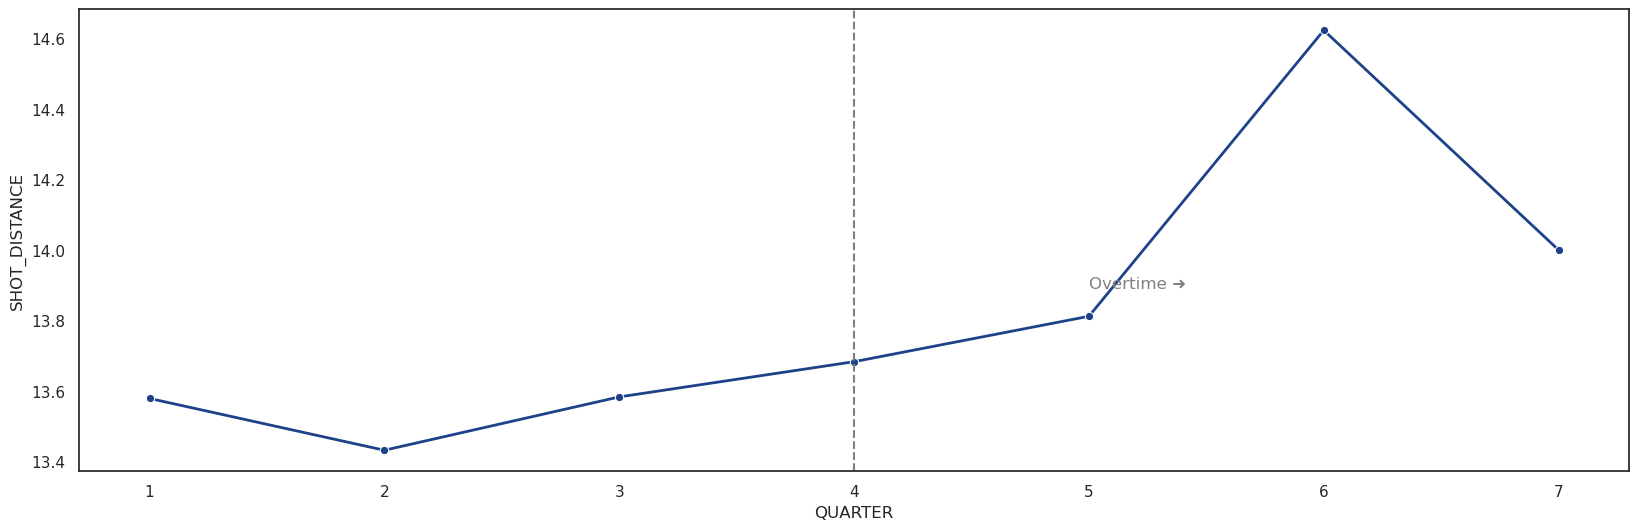

In [196]:
shots_by_quarter = nba_df.groupby('QUARTER')['SHOT_DISTANCE'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.lineplot(
    x='QUARTER', 
    y='SHOT_DISTANCE', 
    data=shots_by_quarter,
    marker='o',
    linewidth=2,
    color='#1D428A'
)


plt.axvline(x=4, color='gray', linestyle='--')
plt.text(5, shots_by_quarter['SHOT_DISTANCE'].max() * 0.95, 'Overtime ➜', color='gray', fontsize=12)

plt.show()